In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['brain-tumour-classification', 'brats-assignment']


In [2]:
x = np.load('../input/brain-tumour-classification/x_train.npy')
y = np.load('../input/brain-tumour-classification/y_train.npy')
x_test = np.load('../input/brain-tumour-classification/x_test.npy')
y_test = np.load('../input/brain-tumour-classification/y_test.npy')
y = y>0
x = x.reshape(-1,120,120,1)
x_test = x_test.reshape(-1,120,120,1)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y)


In [4]:
# updatable plot
# a minimal example (sort of)
from keras.callbacks import Callback
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

Using TensorFlow backend.


In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import *

In [6]:
classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), input_shape = (120, 120,1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'],callbacks=[plot_losses])

print(classifier.summary())
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 64)      640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
__________

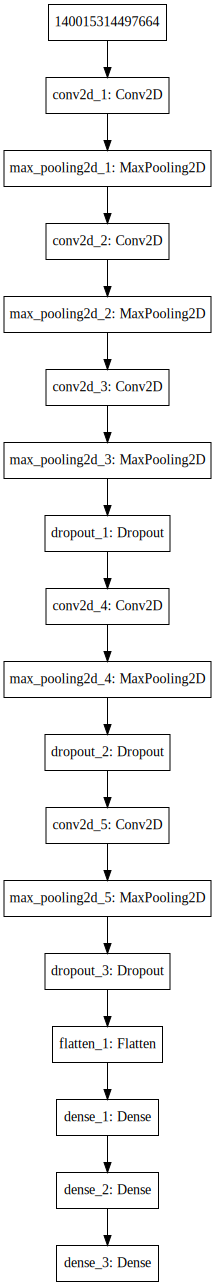

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
plot_model(classifier, to_file='model.png')
SVG(model_to_dot(classifier).create(prog='dot', format='svg'))

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.4,
    horizontal_flip = True)

datagen.fit(x_train)

classifier.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
steps_per_epoch = x.shape[0]/32,
validation_data = (x_val, y_val),
epochs = 25,
callbacks=[learning_rate_reduction])

ValueError: ('Some keys in session_kwargs are not supported at this time: %s', dict_keys(['callbacks']))

In [9]:
score = classifier.evaluate(x_test, y_test, verbose = 0)
print(score)

ValueError: ('Some keys in session_kwargs are not supported at this time: %s', dict_keys(['callbacks']))